## HW 11 - Data fitting with various functions - Due FRIDAY 12 Nov , 2021


Dowload the data from the SDSS DR16:<br>
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/allStar-r12-l33.fits
NOTE: it is a large file and will take a while.


Using masking. Select the approprate fitting function and fit the following selections of the data:
1. Select stars only with with $-1< GLAT < 1$ <br>
   __Fit TEFF,  (TEFF\_ERR)  vs.  LOGG (LOGG\_ERR)__<br>
<br>
2. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
3. Select stars only with with $-2< GLAT < 2$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
4. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (J - K) (J\_ERR, K\_ERR)__<br>
<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
6. __Fit NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
7. __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>
<br>

For each of the above selections:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

def mcFit2(func, x, y, y_err, x_err, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))


def mcFit3(func, x, y, y_err, x_err,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

def mcFit4(func, x, y, y_err, x_err, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APSTAR_ID'; format = '57A'
    name = 'TARGET_ID'; format = '47A'
    name = 'ASPCAP_ID'; format = '59A'
    name = 'FILE'; format = '39A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'J'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    na

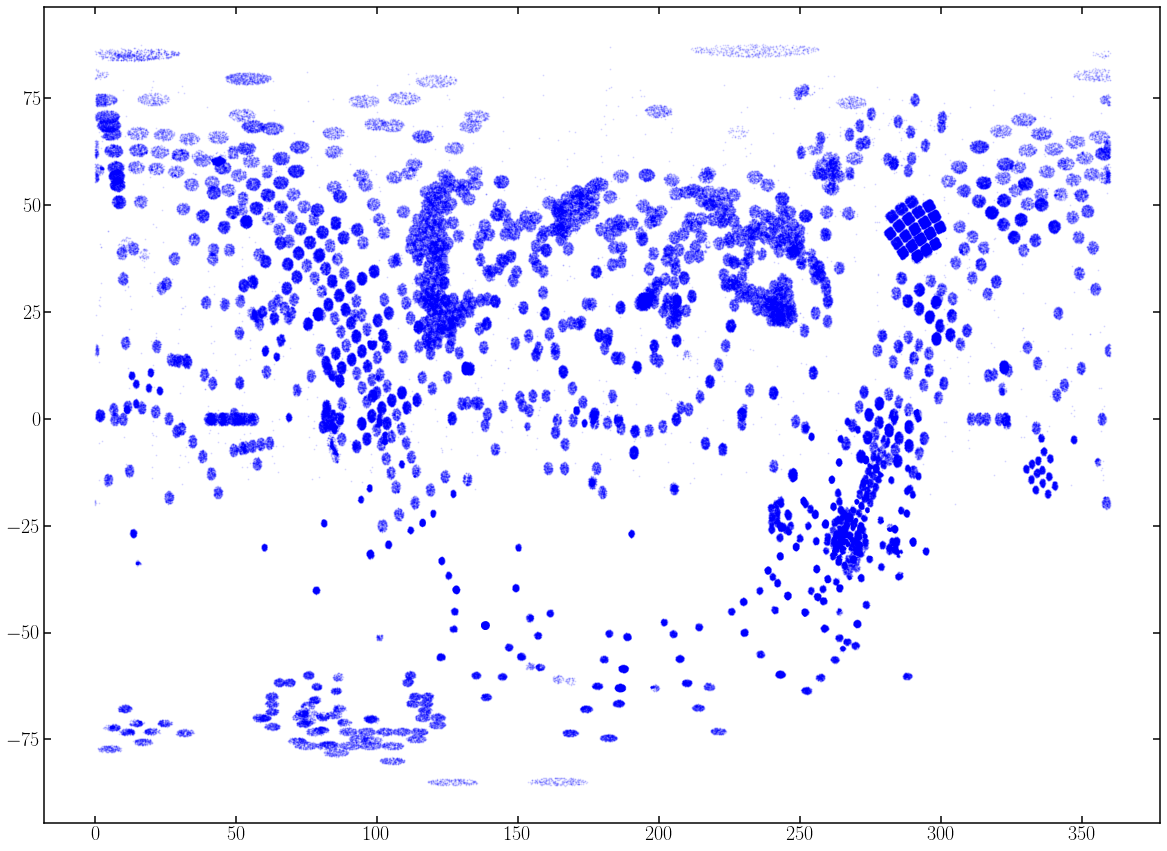

In [15]:
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['RA'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

LINEAR:  -0.09081472391984759 21.076604518657444
COSFIT:  73.84544876279276 0.018556829487765894 -0.4705515352675603 -6.560659872590769


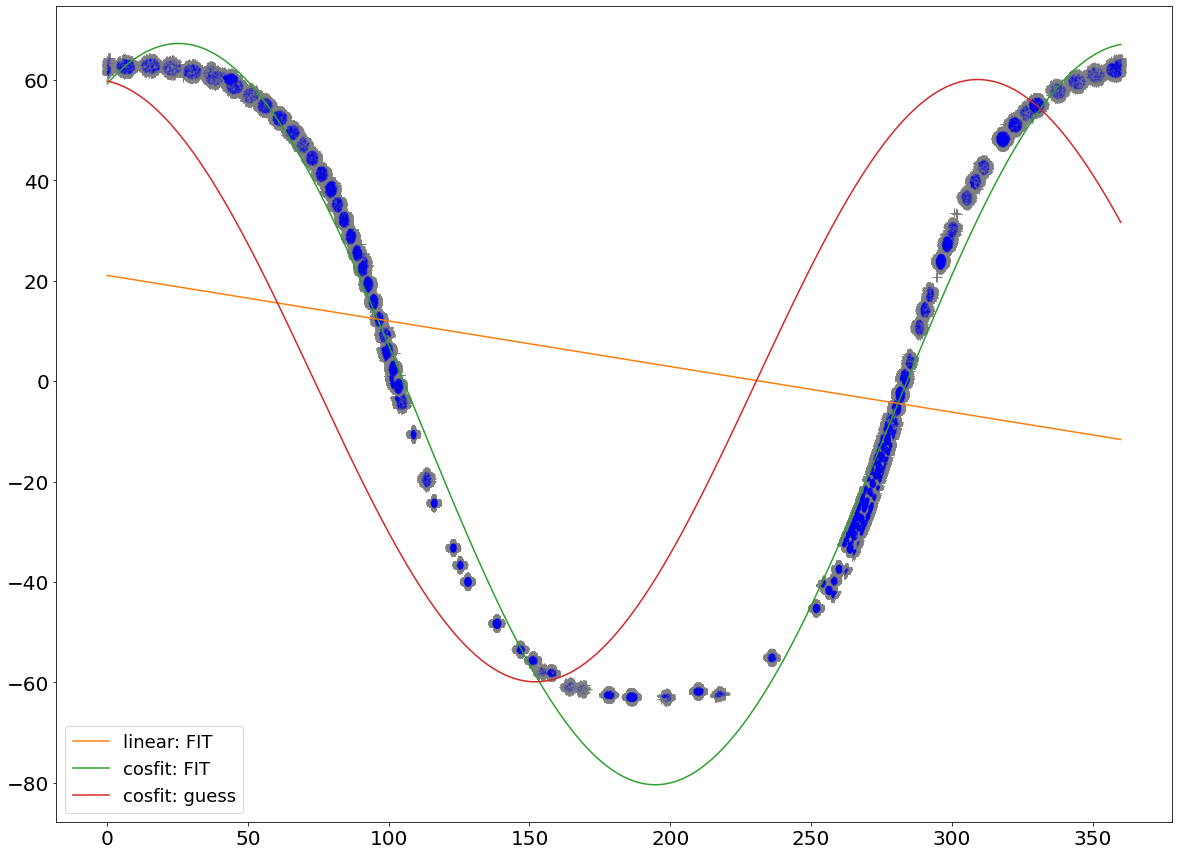

In [5]:
# EXAMPLE FIT - DR. FRINCHABOY
# --------------------------------------------
# First Linear and Polnomial Fits
# Select stars only with with  −2<𝐺𝐿𝐴𝑇<2   
# Fit Fe_H, (Fe_H_ERR) vs. O_FE (O_FE_ERR)
# 
# I FIT ONLY LINEAR AND COSFIT IN THIS EXAMPLE.  

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < 2) & (star['GLAT'] > -2)
cut1 = np.where(ct1)[0]


## LINEAR FIT
slope, intercept = mcFit2(linear, star['RA'][cut1], star['DEC'][cut1], star['RA'][cut1]/1000, star['RA'][cut1]/1000)
print("LINEAR: ",slope, intercept)

## COSFITS
prA, prB, prC, prD = mcFit4(cosfit, star['RA'][cut1], star['DEC'][cut1], star['RA'][cut1]/1000, star['RA'][cut1]/1000,p0=[60,0.02,0,0])
print("COSFIT: ",prA, prB, prC, prD)


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['RA'][cut1],star['DEC'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['RA'][cut1]),star['DEC'][cut1], xerr=(star['RA'][cut1]/1000), yerr=(star['DEC'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)

# PLOT FITS
x_plot = np.linspace(0,360,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#cosfit
ax1.plot(x_plot,cosfit(x_plot, prA, prB, prC, prD), label='cosfit: FIT')
ax1.plot(x_plot,cosfit(x_plot, 60, 0.02, 0.1, 0.1), label='cosfit: guess')


plt.legend(loc='best', fontsize=18)
plt.show()



POLY2:  -2.138108093960004e-07 0.0033845268647560954 -8.702447545686042
POLY3:  -6.9854639878260415e-12 -1.1081059090387764e-07 0.002873378793189098 -7.802860010547768


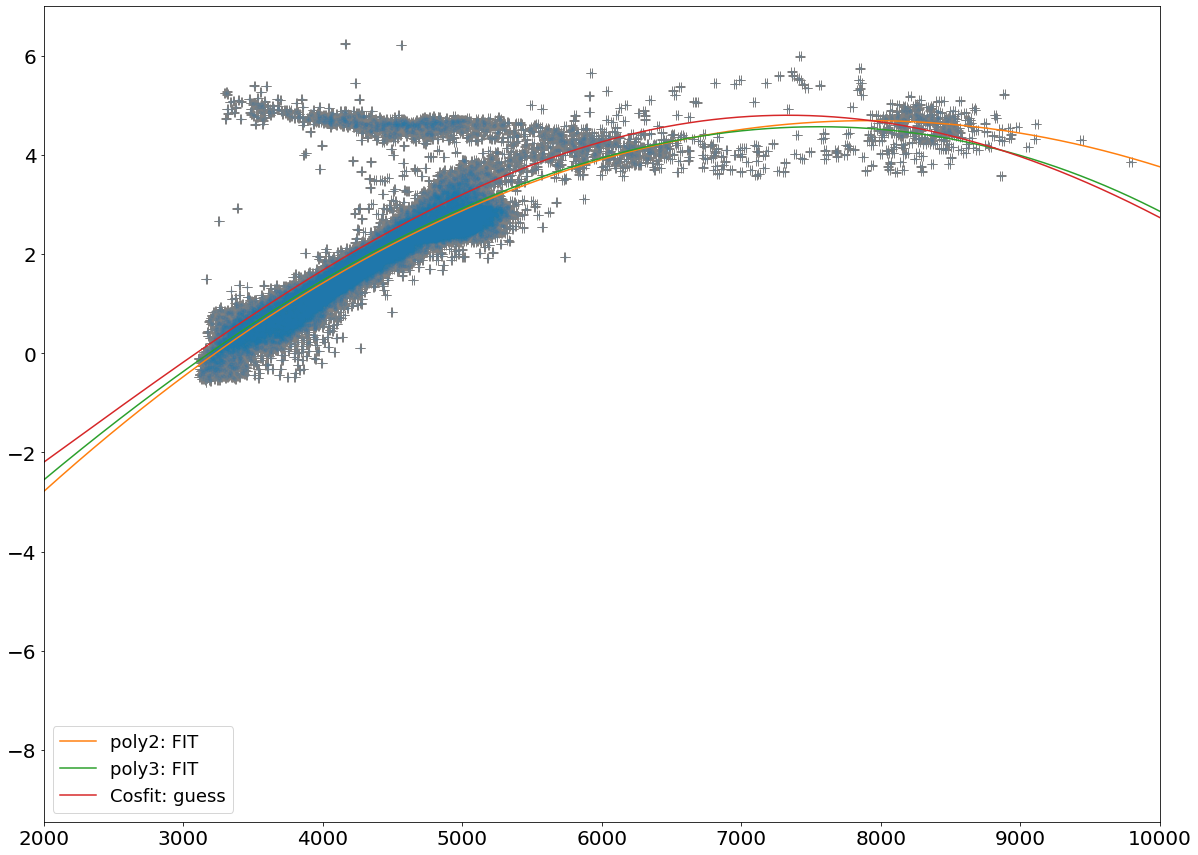

In [57]:
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDED CUTS
ct2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['GLAT'] < 1) & (star['GLAT'] > -1) &\
      (star['TEFF'] > 1000) & (star['LogG'] > -1000)
cut2 = np.where(ct2)[0]

## create figures

fig_2 = plt.figure(figsize=(20,15)) ## figure plot
ax_2 = fig_2.add_subplot(111)

## plot the raw data and error bars

ax_2.scatter(star['TEFF'][cut2], star['LogG'][cut2],s=10,alpha=0.1) 
ax_2.errorbar((star['TEFF'][cut2]),star['LogG'][cut2], xerr=(star['TEFF'][cut2]/1000), yerr=(star['LogG'][cut2]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)

ax_2.xaxis.set_tick_params(labelsize=20)
ax_2.yaxis.set_tick_params(labelsize=20)

## Linear Fit: Hide for now

#slope, intercept = mcFit2(linear, star['TEFF'][cut2], star['LogG'][cut2], star['TEFF'][cut2]/1000, star['LogG'][cut2]/1000)
#print("LINEAR: ",slope, intercept)

## Polynomial degree 2 Fit: 

param1, param2, param3 = mcFit3(poly2, star['TEFF'][cut2], star['LogG'][cut2], star['TEFF'][cut2]/1000, star['LogG'][cut2]/1000)
print("POLY2: ", param1, param2,param3)

## Polynomial degree 3 Fit:

param1_2, param2_2, param3_2, param4_2 = mcFit4(poly3, star['TEFF'][cut2], star['LogG'][cut2], star['TEFF'][cut2]/1000, star['LogG'][cut2]/1000)
print("POLY3: ", param1_2, param2_2,param3_2, param4_2)

## Exponential Fit: looks like it won't work. Maybe test later.

#(param1_3, param2_3, param3_3, param4_3 = mcFit4(exponential, star['TEFF'][cut2], star['LogG'][cut2], star['TEFF'][cut2]/1000, star['LogG'][cut2]/1000))
#(print("EXPONENTIAL: ", param1_3, param2_3,param3_3, param4_3))

## Cosine Fit:

#Hide for now:param1_4, param2_4, param3_4, param4_4 = mcFit4(poly3, star['TEFF'][cut2], star['LogG'][cut2], star['TEFF'][cut2]/1000, star['LogG'][cut2]/1000, p0 = [5,0.0003,-2.2,0.4])
              #print("COSFIT: ", param1_4, param2_4,param3_4, param4_4)

# PLOT FITS
x_plot = np.linspace(0,10000,10000) # X-PLOTING FOR FITS
#linear fit: hide for now
#ax_2.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit: 
ax_2.plot(x_plot,poly2(x_plot, param1, param2, param3), label='poly2: FIT')
#poly3 fit
ax_2.plot(x_plot,poly3(x_plot, param1_2, param2_2, param3_2, param4_2), label='poly3: FIT')

#exponential fit: 
# hide for nowax_2.plot(x_plot,exponential(x_plot, param1_3, param2_3, param3_3, param4_3), label='Exponential: FIT')

#cosfit plot
# hide for now: ax_2.plot(x_plot,cosfit(x_plot, param1_4, param2_4, param3_4, param4_4), label='Cosfit: FIT')                                                
ax_2.plot(x_plot,cosfit(x_plot, 6.8, 0.0003, -2.2, -2), label='Cosfit: guess') 

ax_2.set_xlim(2000,10000)

plt.legend(loc='best', fontsize=18)
plt.show()

